In [1]:


import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Projects\movies.csv')

In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
len(df)-len(df.drop_duplicates())


0

In [4]:
df.drop_duplicates(inplace=True)

In [5]:

df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 1)))

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 28.3%
gross - 2.5%
company - 0.2%
runtime - 0.1%


In [7]:
df = df.dropna()

In [8]:
df.shape

(5421, 15)

In [9]:

df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:

# Changing columns data type

df = df.astype({'budget': 'int64','gross': 'int64','votes': 'int64', })

In [11]:
# Creating correct Year column

df[['date', 'country1']] = df['released'].astype(str).str.split('(', expand=True)

df['year'] = df['date'].str[-5:].str.strip()

df.drop(['country1', 'date'], axis=1, inplace=True)

In [12]:
# Creating correct realeased date column

df[['realeased_date', 'country1']] = df['released'].astype(str).str.split('(', expand=True)
df.drop(['country1'], axis=1, inplace=True)

In [13]:
# Dropping unused column

df.drop(['released'], axis=1, inplace=True)

In [15]:
# Sorting data

df = df.sort_values(by=['gross'], ascending=False)


In [16]:

# Data after cleaning process

df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,realeased_date
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18, 2009"
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 2019"
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19, 1997"
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015"
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018"


In [17]:
# Details about gross and budget tables

df[['gross', 'budget']].describe()


,gross,budget
count,5.421000e+03,5.421000e+03
mean,1.032297e+08,3.600917e+07
std,1.873027e+08,4.157337e+07
min,3.090000e+02,6.000000e+03
25%,1.073640e+07,1.000000e+07
50%,3.686941e+07,2.180000e+07
75%,1.124625e+08,4.500000e+07
max,2.847246e+09,3.560000e+08


In [18]:

# Looking at the top 15 companies by gross revenue

df.groupby('company')[['gross']].sum().sort_values('gross', ascending=False)[:10]

,gross
company,
Warner Bros.,54610959970
Universal Pictures,51241105418
Columbia Pictures,42356430218
Paramount Pictures,40021704691
Twentieth Century Fox,39542573303
Walt Disney Pictures,35833650748
New Line Cinema,19612851164
Marvel Studios,15065592411
DreamWorks Animation,11873612858


In [19]:
# Company gross revenue sum sorted 

df.groupby(['company', 'year'])[['gross']].sum().sort_values('gross', ascending=False)[:15]


,,gross
company,year,
Walt Disney Pictures,2019,5773131804
Marvel Studios,2018,4018631866
Universal Pictures,2015,3834354888
Twentieth Century Fox,2009,3793491246
Walt Disney Pictures,2017,3789382071
Paramount Pictures,2011,3565705182
Warner Bros.,2011,3168551343
Walt Disney Pictures,2010,3104474158
Paramount Pictures,2014,3071298586


In [20]:
# Company gross revenue mean sorted 

df.groupby(['company', 'year'])[['gross']].mean().sort_values(['gross','company', 'year'], ascending=False)[:15]

gross
company                       year              
Marvel Studios                2019  2.797501e+09
Lucasfilm                     2015  2.069522e+09
Marvel Studios                2012  1.518816e+09
Walt Disney Animation Studios 2019  1.450027e+09
Marvel Studios                2015  1.402810e+09
                              2018  1.339544e+09
Walt Disney Animation Studios 2013  1.281508e+09
Mandeville Films              2017  1.264435e+09
Illumination Entertainment    2015  1.159445e+09
Pixar Animation Studios       2019  1.073395e+09
Metro-Goldwyn-Mayer (MGM)     2012  1.062787e+09
Lucasfilm                     2016  1.056058e+09
Illumination Entertainment    2017  1.034800e+09
Pixar Animation Studios       2016  1.028571e+09
Lucasfilm                     1999  1.027083e+09

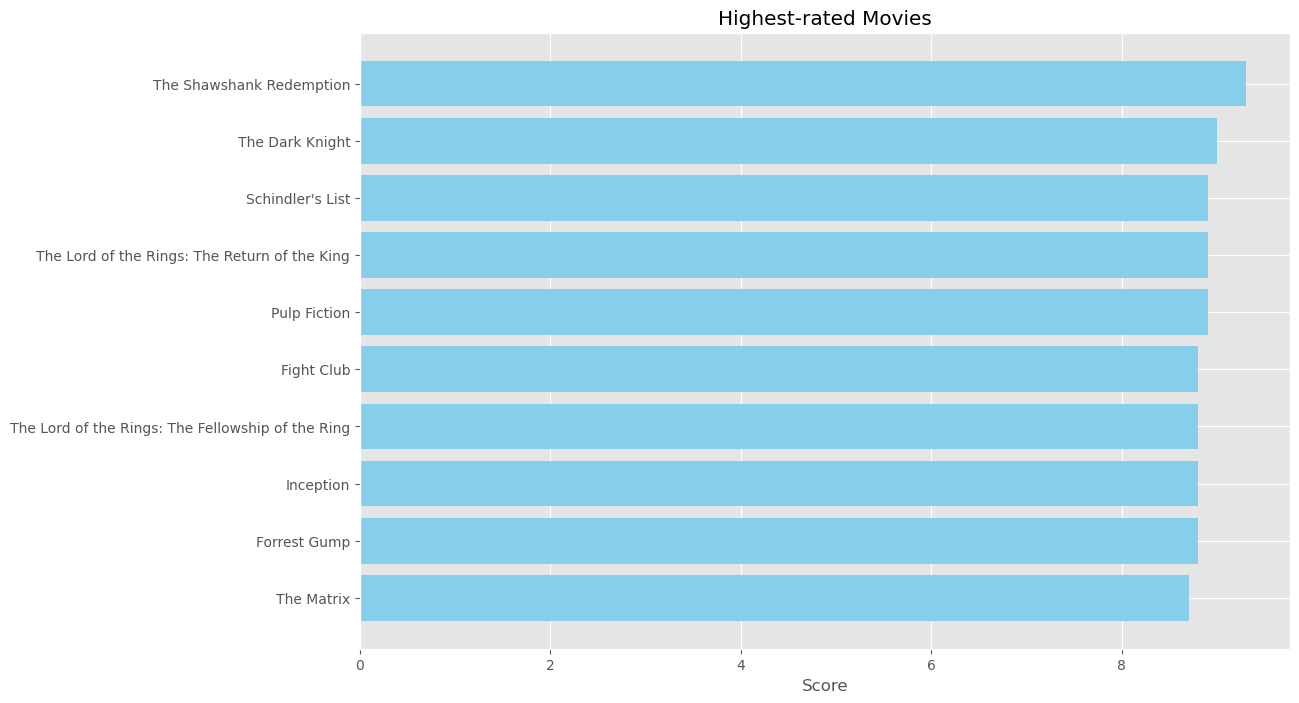

In [21]:
film_ranking = df.sort_values('score', ascending=False)

plt.barh(film_ranking['name'].head(10),film_ranking['score'].head(10), align='center', color='skyblue')

plt.gca().invert_yaxis()
plt.xlabel("Score")
plt.title("Highest-rated Movies")
plt.show()

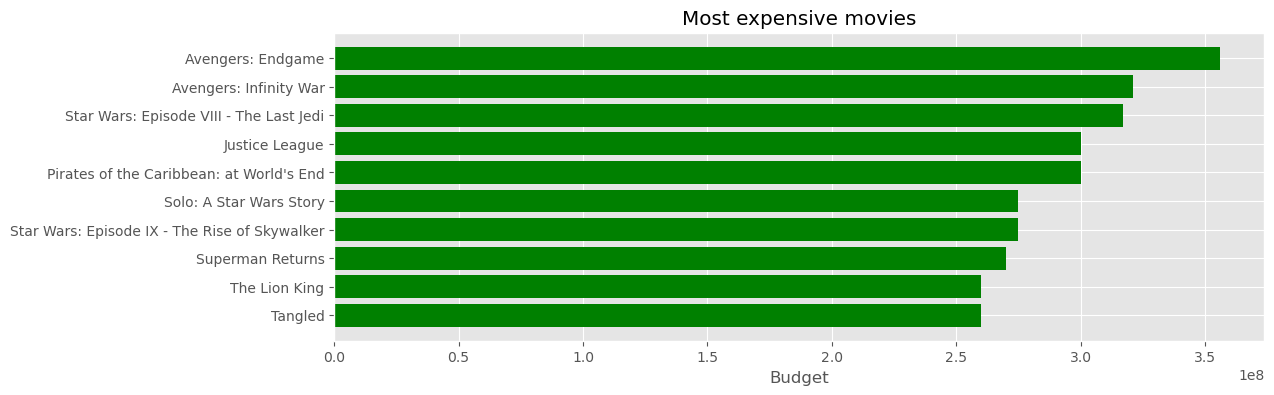

In [22]:
budget_ranking = df.sort_values('budget', ascending=False)

plt.figure(figsize=(12,4))

plt.barh(budget_ranking['name'].head(10),budget_ranking['budget'].head(10), align='center',
        color='green')
plt.gca().invert_yaxis()
plt.xlabel("Budget")
plt.title("Most expensive movies")
plt.show()

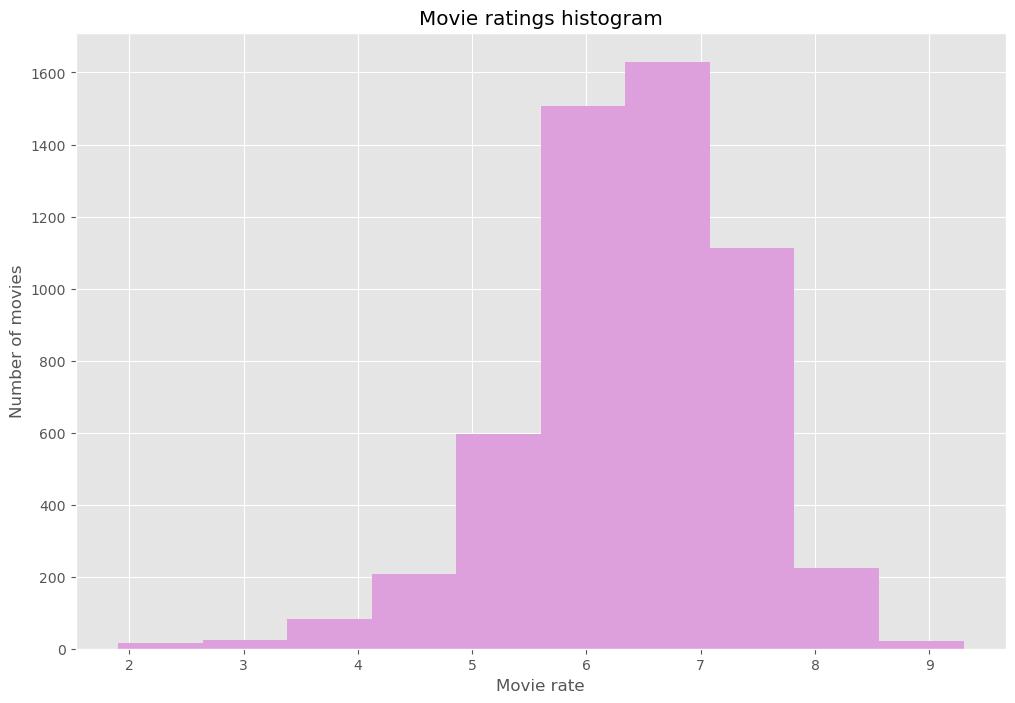

In [23]:
plt.hist(x=df['score'], bins=10, color='plum')
plt.xlabel('Movie rate')
plt.ylabel('Number of movies')
plt.title("Movie ratings histogram")
plt.show()


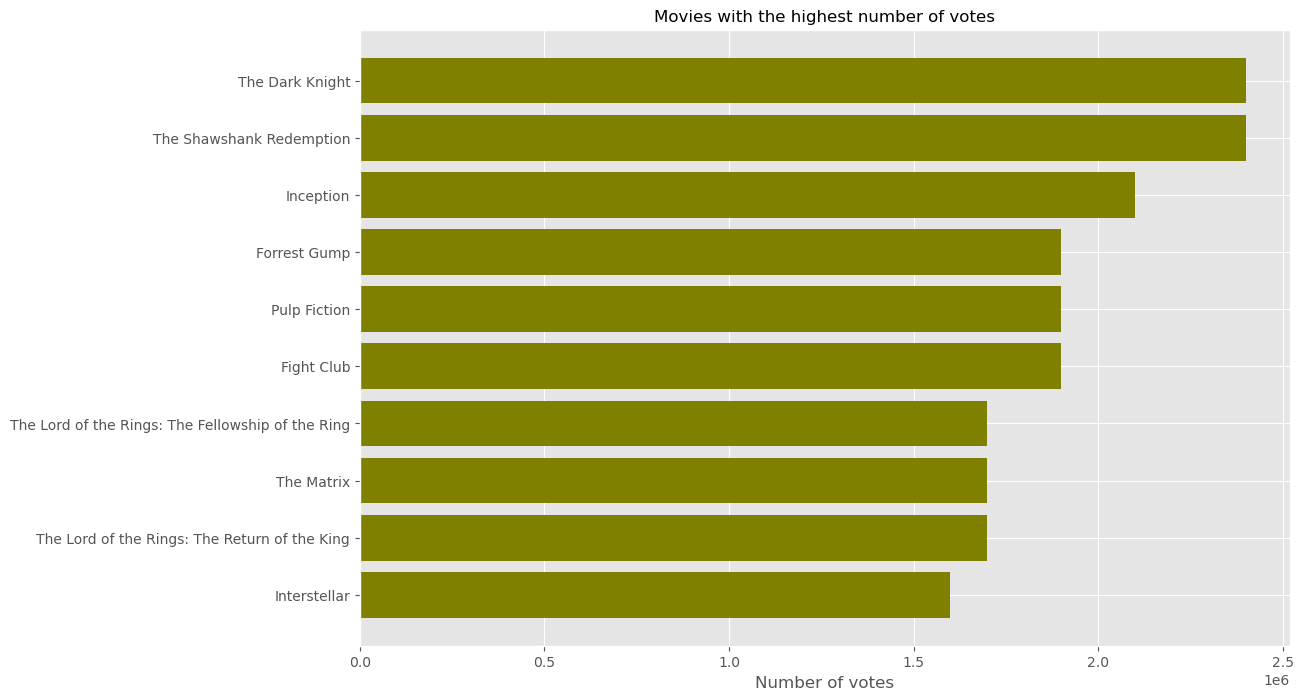

In [24]:
film_ranking = df.sort_values('votes', ascending=False)

plt.barh(film_ranking['name'].head(10),film_ranking['votes'].head(10), align='center', color='olive')

plt.gca().invert_yaxis()
plt.xlabel("Number of votes")
plt.title("Movies with the highest number of votes", fontsize=12)
plt.show()

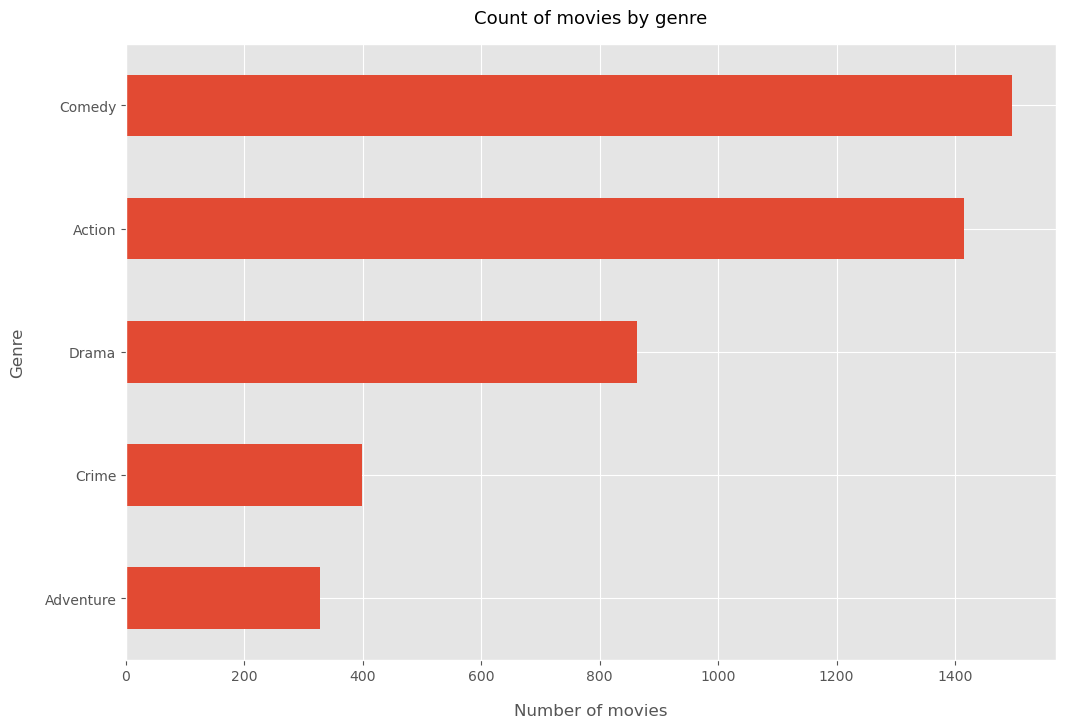

In [25]:
df['genre'].value_counts().head(5).sort_values().plot(kind='barh')

plt.xlabel('Number of movies', labelpad=14, fontsize=12)
plt.ylabel('Genre', labelpad=14, fontsize=12)
plt.title('Count of movies by genre', y=1.02, fontsize=13)
plt.show()

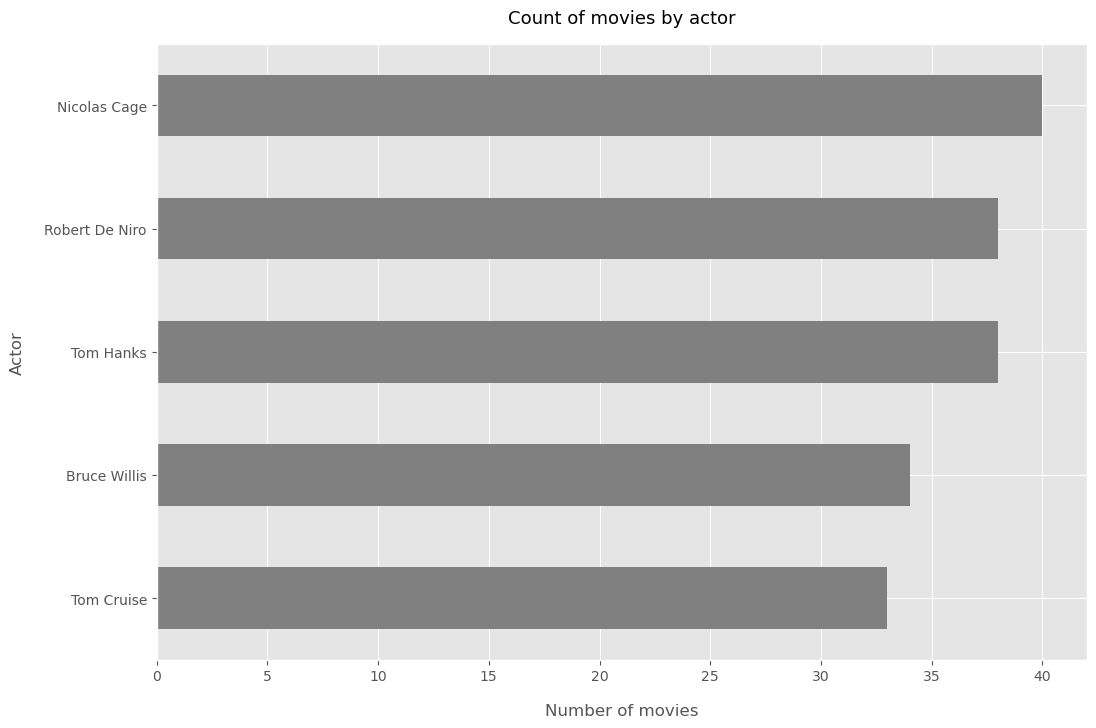

In [26]:
df['star'].value_counts().head(5).sort_values().plot(kind='barh', color='grey')

plt.xlabel('Number of movies', labelpad=14, fontsize=12)
plt.ylabel('Actor', labelpad=14, fontsize=12)
plt.title('Count of movies by actor', y=1.02, fontsize=13)
plt.show()

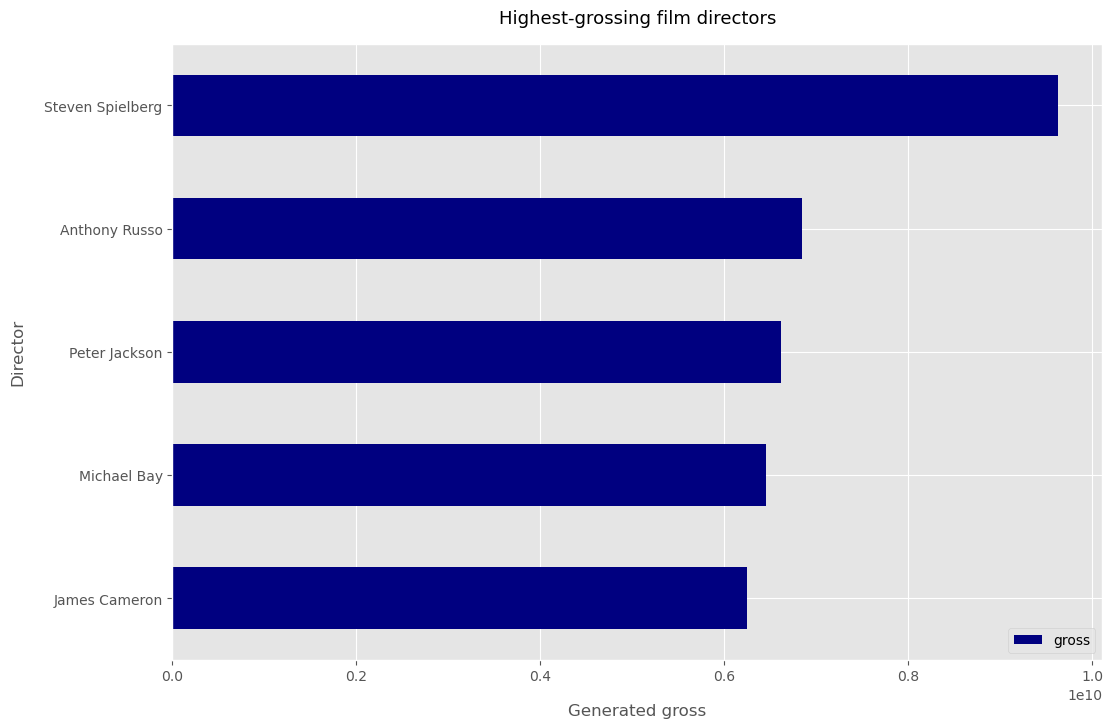

In [27]:
df.groupby(['director'])[['gross']].sum().sort_values(['gross'], ascending=False).head(5).plot(kind='barh', color='navy')

plt.gca().invert_yaxis()                                                                                               
plt.xlabel('Generated gross', labelpad=14, fontsize=12)
plt.ylabel('Director', labelpad=14, fontsize=12)
plt.title('Highest-grossing film directors', y=1.02, fontsize=13)
plt.show()

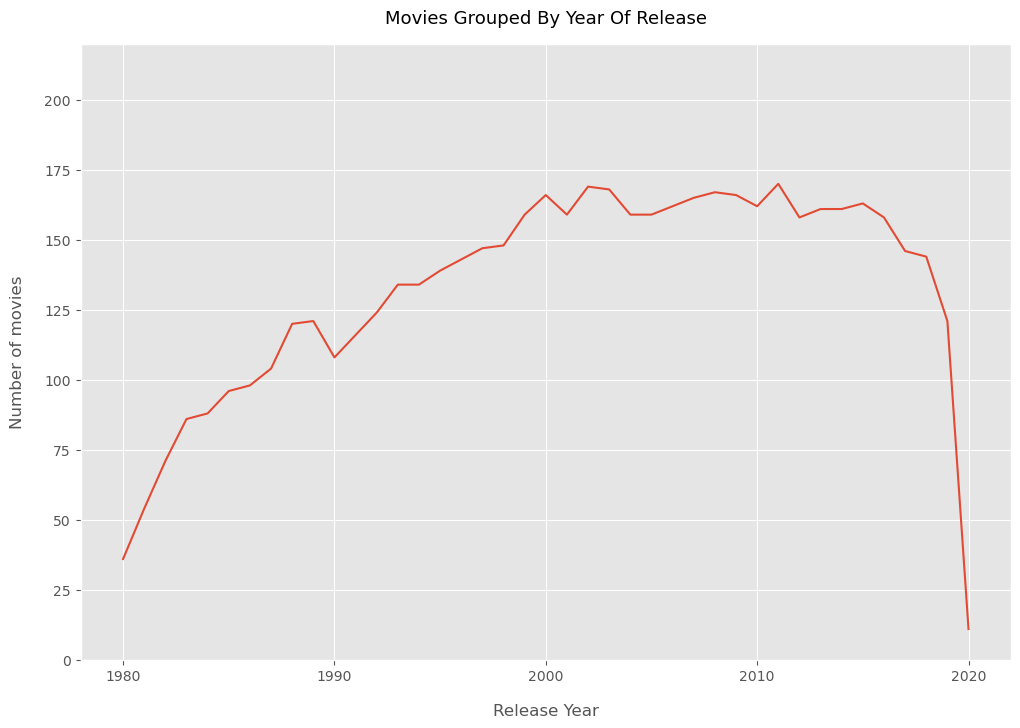

In [28]:

data = df['year'].value_counts().sort_index()

plt.plot(data.index, data.values)

plt.title('Movies Grouped By Year Of Release',y=1.02, fontsize=13)
plt.xlabel('Release Year', labelpad=14, fontsize=12)
plt.ylabel('Number of movies', labelpad=14, fontsize=12)

plt.ylim(0, max(data.values)+50)
plt.xticks(['1980', '1990', '2000', '2010', '2020'])
plt.show()


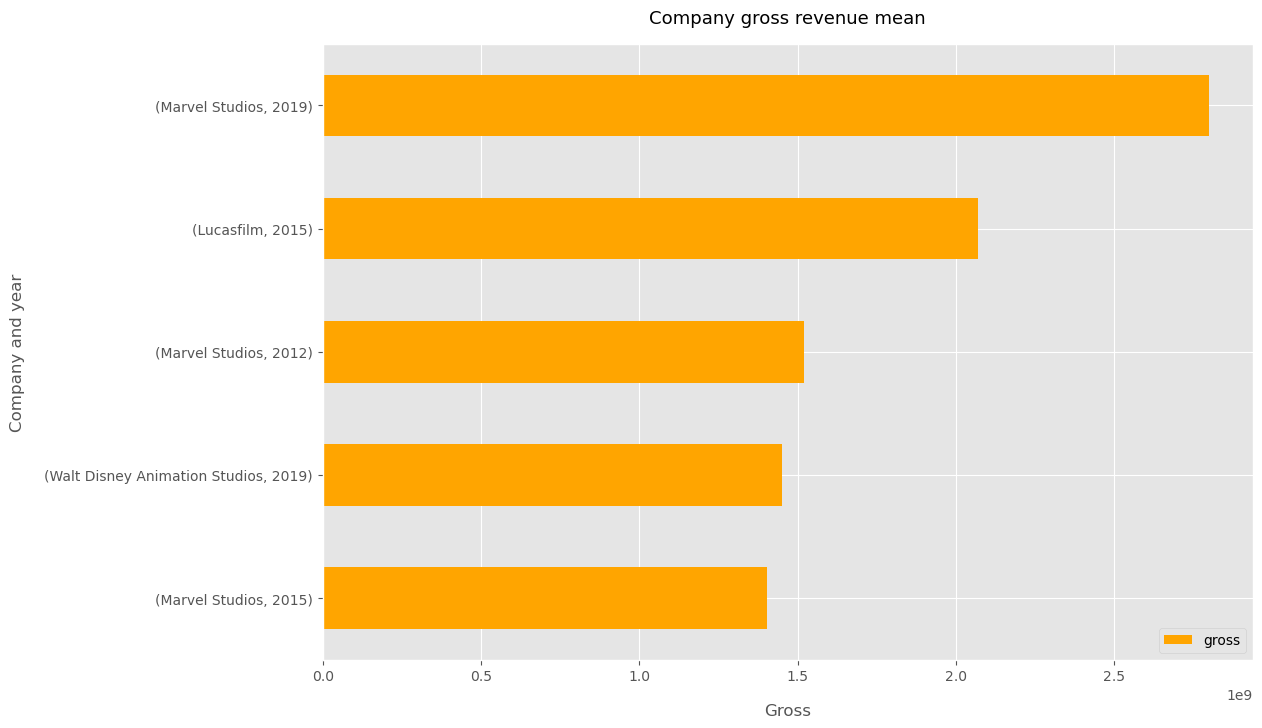

In [29]:
df.groupby(['company', 'year'])[['gross']].mean().sort_values(['gross','company', 'year'], ascending=False).head(5).plot(kind='barh', color='orange')

plt.gca().invert_yaxis()
plt.xlabel('Gross', labelpad=14, fontsize=12)
plt.ylabel('Company and year', labelpad=14, fontsize=12)
plt.title('Company gross revenue mean', y=1.02, fontsize=13)
plt.show()

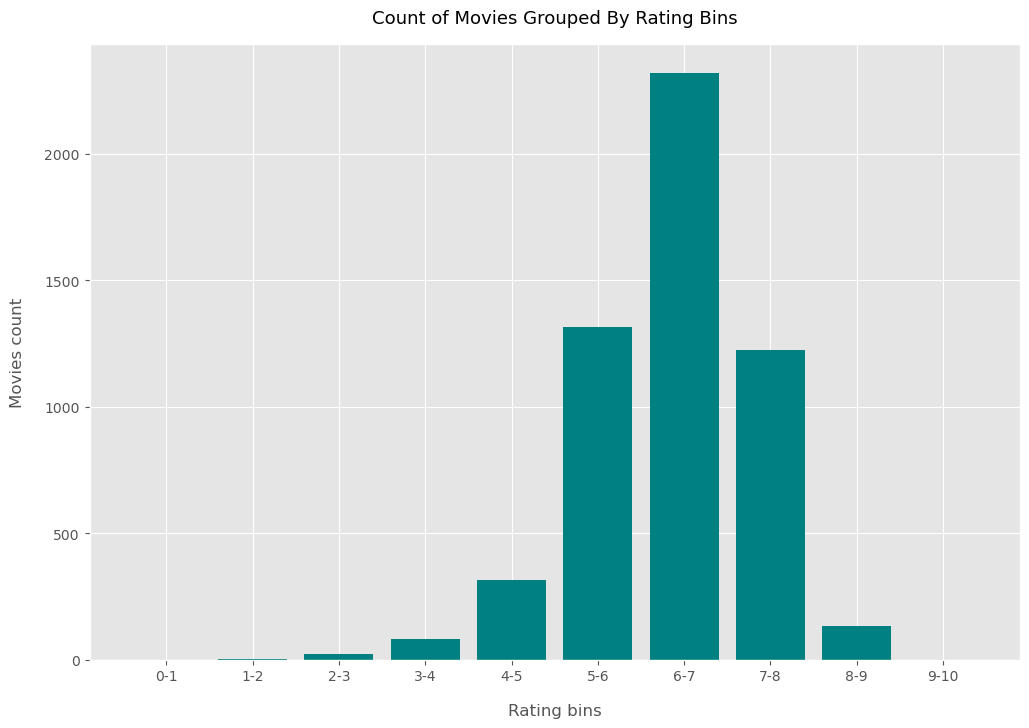

In [30]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10']
df['score_bin'] = pd.cut(x = df['score'], bins = bins, labels = labels, include_lowest = True)

x = df['score_bin'].value_counts().sort_index()

plt.bar(x.index, x.values, color='teal')
plt.title('Count of Movies Grouped By Rating Bins',y=1.02, fontsize=13)
plt.xlabel('Rating bins', labelpad=14, fontsize=12)
plt.ylabel('Movies count', labelpad=14, fontsize=12)
plt.show()

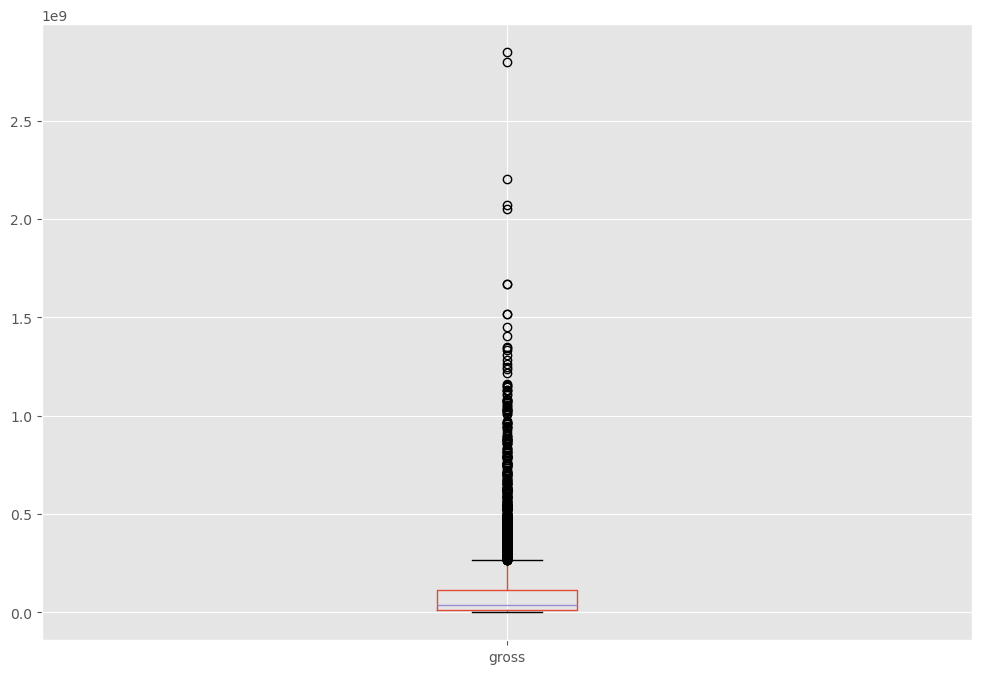

In [31]:
# Lokking for outliers

df.boxplot(column=['gross'])
plt.show()


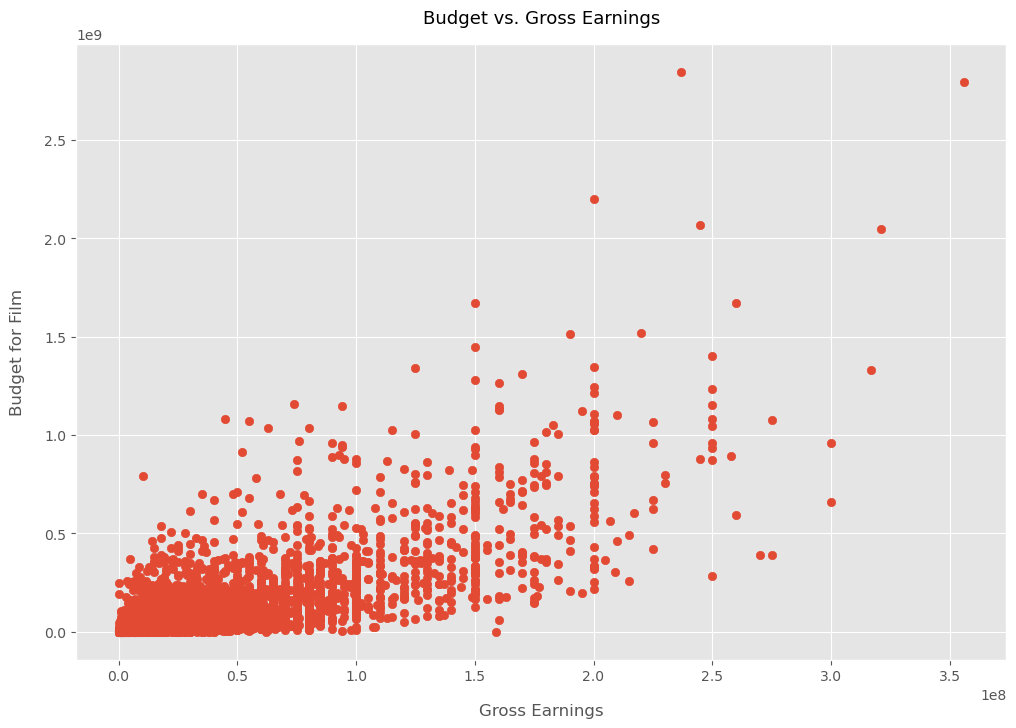

In [32]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs. Gross Earnings', y=1.02, fontsize=13)

plt.xlabel('Gross Earnings', labelpad=14, fontsize=12)
plt.ylabel('Budget for Film', labelpad=14, fontsize=12)
plt.show()

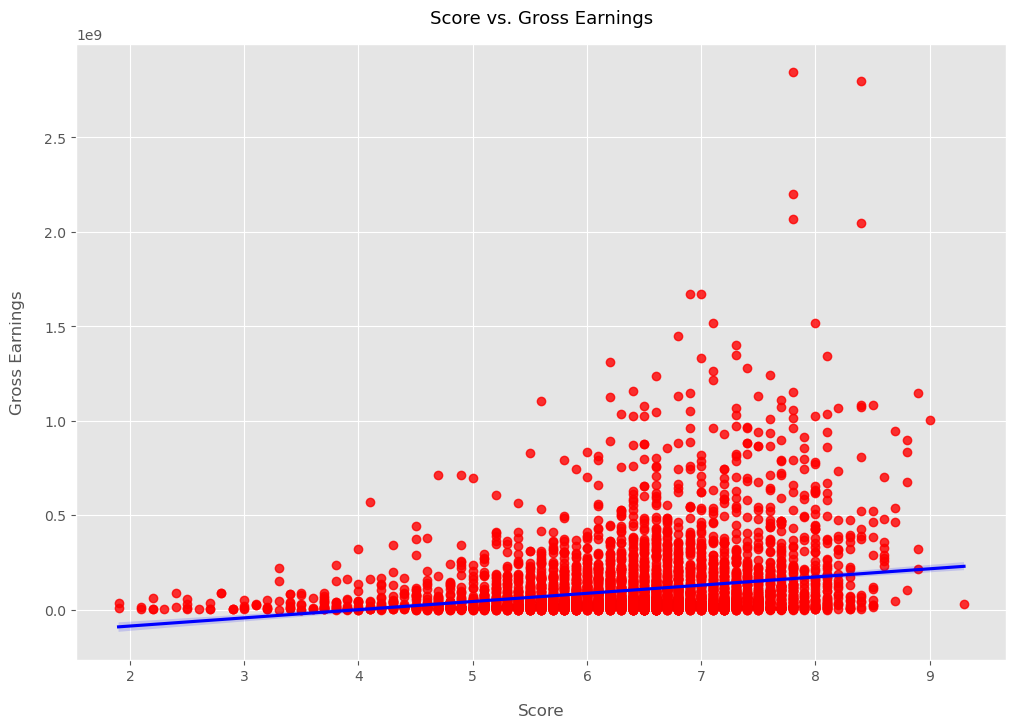

In [33]:
# Plot score vs gross using seaborn

sns.regplot(data=df, x='score', y='gross', scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

plt.title('Score vs. Gross Earnings', y=1.02, fontsize=13)

plt.xlabel('Score', labelpad=14, fontsize=12)
plt.ylabel('Gross Earnings', labelpad=14, fontsize=12)
plt.show()


In [36]:

# Correlation Matrix between all numeric columns

df.corr(numeric_only=True)



,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


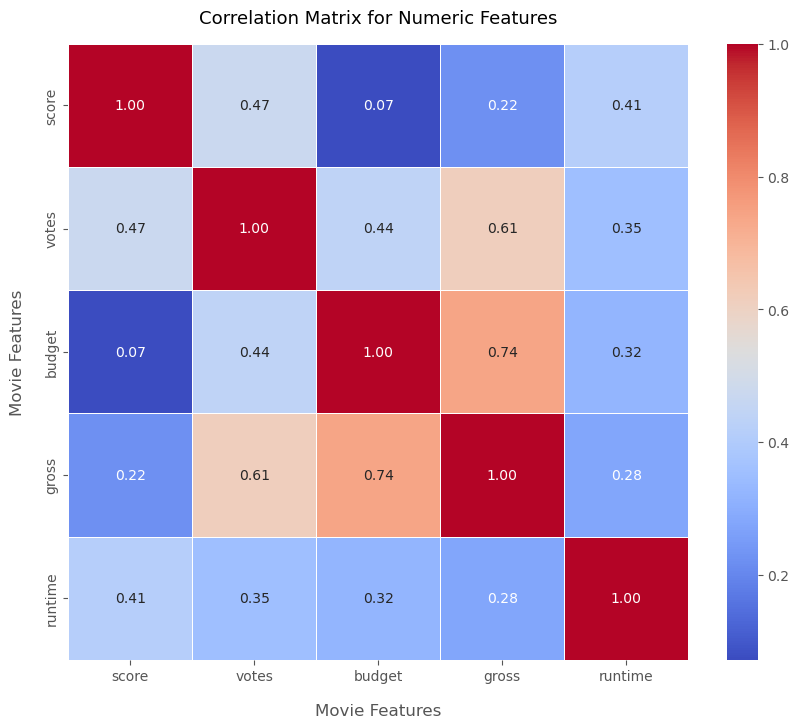

In [37]:

correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix for Numeric Features', y=1.02, fontsize=13)
plt.xlabel('Movie Features', labelpad=14, fontsize=12)
plt.ylabel('Movie Features', labelpad=14, fontsize=12)
plt.show()

In [39]:
# Unstacked correlation between numeric features

correlation_mat = df.corr(numeric_only=True)

corr_pairs = correlation_mat.unstack()

corr_pairs

score    score      1.000000
         votes      0.474256
         budget     0.072001
         gross      0.222556
         runtime    0.414068
votes    score      0.474256
         votes      1.000000
         budget     0.439675
         gross      0.614751
         runtime    0.352303
budget   score      0.072001
         votes      0.439675
         budget     1.000000
         gross      0.740247
         runtime    0.318695
gross    score      0.222556
         votes      0.614751
         budget     0.740247
         gross      1.000000
         runtime    0.275796
runtime  score      0.414068
         votes      0.352303
         budget     0.318695
         gross      0.275796
         runtime    1.000000
dtype: float64

In [40]:
# Sorting unstacked correlation

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget   score      0.072001
score    budget     0.072001
         gross      0.222556
gross    score      0.222556
runtime  gross      0.275796
gross    runtime    0.275796
budget   runtime    0.318695
runtime  budget     0.318695
         votes      0.352303
votes    runtime    0.352303
runtime  score      0.414068
score    runtime    0.414068
budget   votes      0.439675
votes    budget     0.439675
         score      0.474256
score    votes      0.474256
gross    votes      0.614751
votes    gross      0.614751
budget   gross      0.740247
gross    budget     0.740247
score    score      1.000000
budget   budget     1.000000
votes    votes      1.000000
gross    gross      1.000000
runtime  runtime    1.000000
dtype: float64

In [41]:
# Highest correlation

high_corr = sorted_pairs[sorted_pairs > 0.5]

high_corr

gross    votes      0.614751
votes    gross      0.614751
budget   gross      0.740247
gross    budget     0.740247
score    score      1.000000
budget   budget     1.000000
votes    votes      1.000000
gross    gross      1.000000
runtime  runtime    1.000000
dtype: float64

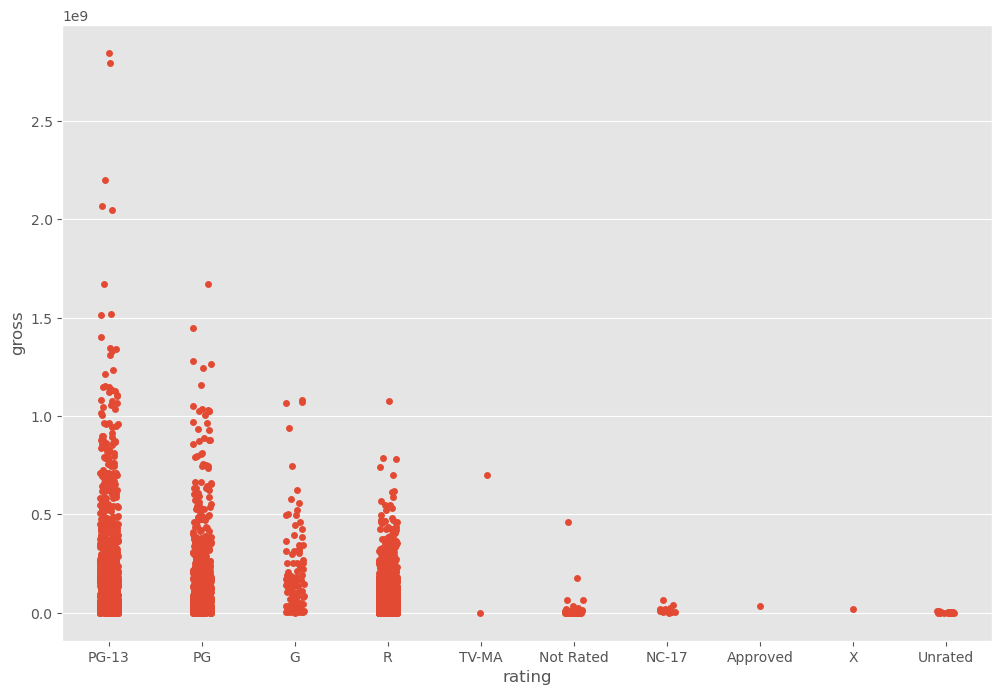

In [42]:
sns.stripplot(x="rating", y="gross", data=df)

plt.show()


In [43]:
# Changing non numeric columns data type to categorical and numerizing them

df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,realeased_date,score_bin
5445,386,5,0,29,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,496,7-8
7445,388,5,0,39,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,124,8-9
3045,4909,5,6,17,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,502,7-8
6663,3643,5,0,35,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,498,7-8
7244,389,5,0,38,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,132,8-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,35,5.8,3500,585,2924,1498,47,3000000,5073,1385,96.0,847,5-6
2434,2969,5,0,14,4.5,1900,1805,3102,186,47,5000000,2970,1376,97.0,1386,4-5
3681,1595,3,6,21,6.8,43000,952,1683,527,6,5000000,2554,466,108.0,1628,6-7
272,2909,6,9,2,3.9,2300,261,55,1473,47,800000,2270,582,85.0,1442,3-4


In [45]:
# Correlation between categorical variables

df_numerized.corr(numeric_only=True)


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,realeased_date
name,1.000000,-0.029234,0.010996,0.025542,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,-0.006155
rating,-0.029234,1.000000,0.147796,0.022021,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.017349
genre,0.010996,0.147796,1.000000,-0.069147,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,0.021321
year,0.025542,0.022021,-0.069147,1.000000,0.061923,0.203098,-0.037371,-0.025495,-0.032687,-0.073569,0.320312,0.268721,-0.018806,0.075294,-0.006091
score,0.014450,0.065983,0.035106,0.061923,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.046091
votes,0.012615,0.006031,-0.135990,0.203098,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.029593
director,0.015246,0.014656,-0.008553,-0.037371,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,0.002481
writer,0.012880,-0.003149,0.017578,-0.025495,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,0.008145
star,-0.006882,0.009196,0.003341,-0.032687,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,0.015558
country,-0.025490,0.008230,-0.009164,-0.073569,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477,-0.017043


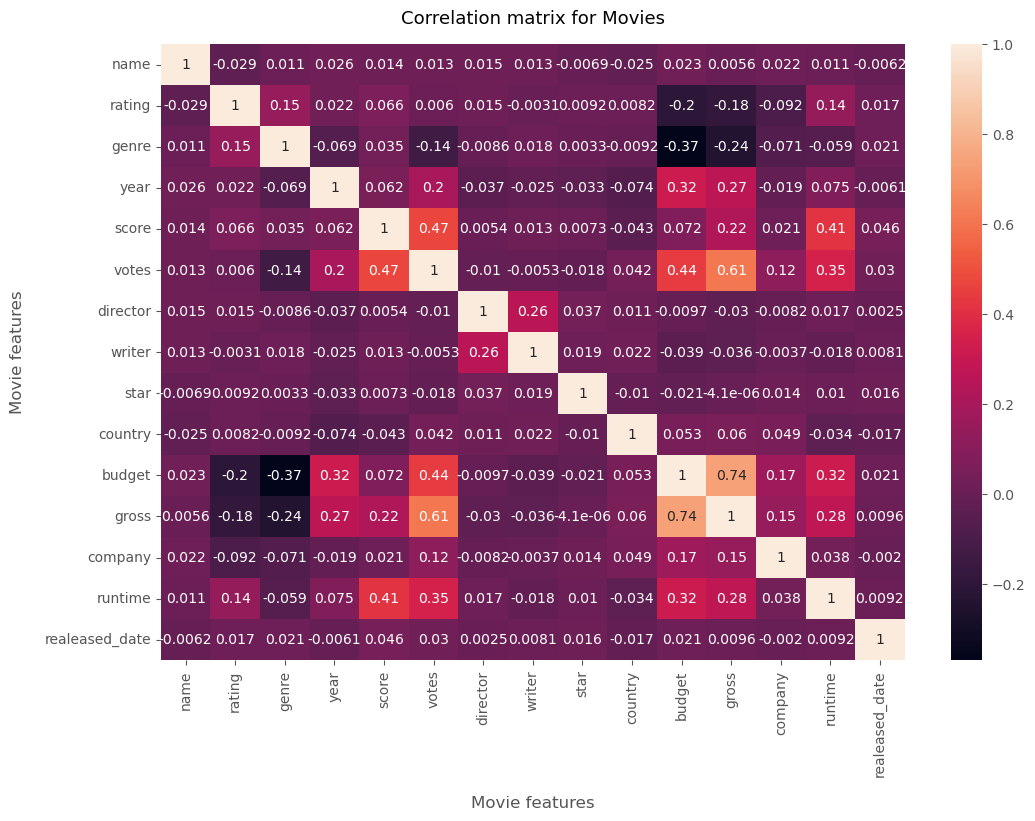

In [47]:
correlation_matrix = df_numerized.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies", y=1.02, fontsize=13)

plt.xlabel("Movie features", labelpad=14, fontsize=12)
plt.ylabel("Movie features", labelpad=14, fontsize=12)

plt.show()